In [19]:
#studying the factors that drive gross revenue in movies

In [20]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy  as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

#read in the data
df = pd.read_csv(open(r'C:\Users\tareq\OneDrive\Desktop\core\work\data science\Python\project 1 movies\movies.csv'))

In [67]:
#preview the data
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


In [21]:
#look for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [22]:
#Check data types for columns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [68]:
#change datatype of budget and gross columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


In [69]:
#create correct year column
df['year_correct'] = df['released'].astype(str).str[:4]
df.head(5)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,2290
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,1800
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,910
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,2247
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,1987


In [38]:
#display all highest grossing rows
pd.set_option('display.max_rows', None)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [33]:
#evaluate if budget has a high correlation with gross revenue 

In [ ]:
#scatter plot with budget vs gross

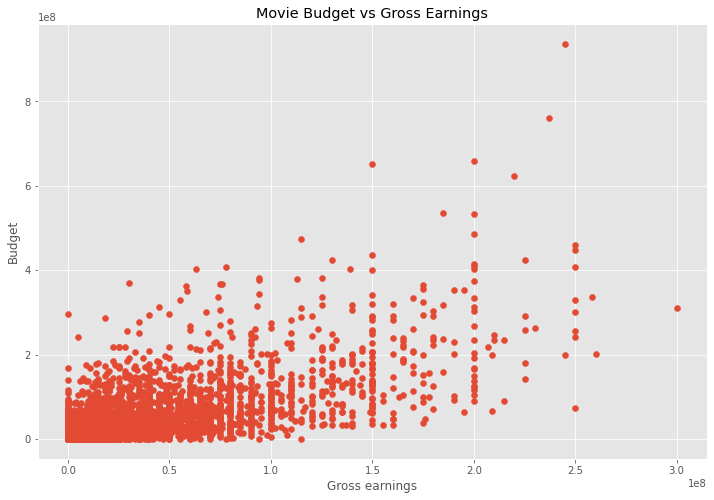

In [41]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Movie Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget')
plt.show()

In [70]:
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,2290
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,1800
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,910
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,2247
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,1987


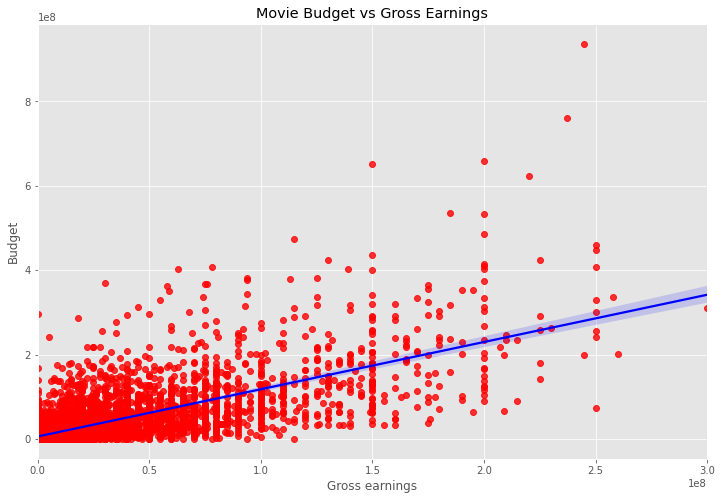

In [44]:
#plot budget vs gross using seaborn correlation
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Movie Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget')
plt.show()

In [48]:
#evaluate correlation
df.corr(method ='pearson') #pearson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [49]:
#high correlation between budget and gross

Text(87.0, 0.5, 'Movie Features')

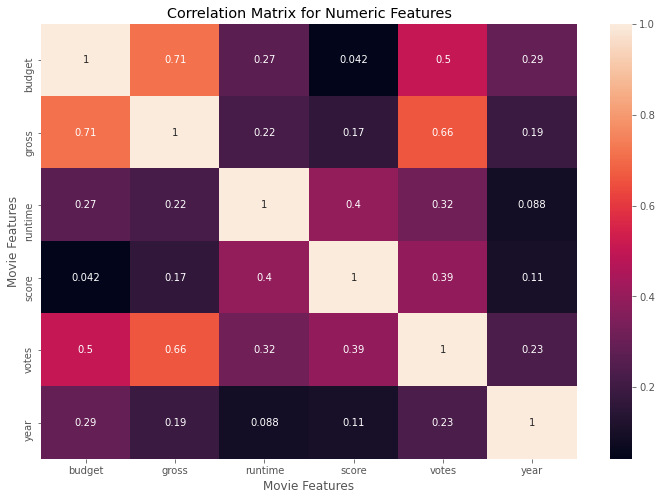

In [51]:
correlation_matrix = df.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [71]:
#using category, create a numeric representation of all fields to include all columns into the correlation
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,1436
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,892
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,2305
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,1388
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,1098


Text(86.59375, 0.5, 'Movie Features')

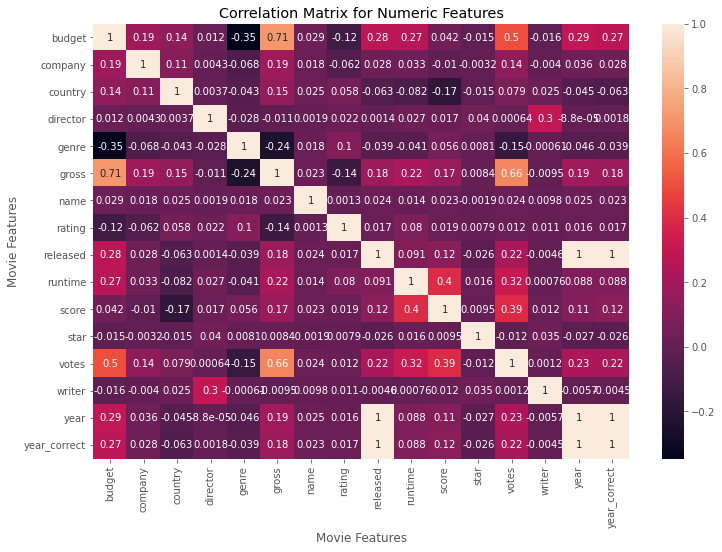

In [57]:
correlation_matrix = df_numerized.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [59]:
#company does not have high correlation with gross revenue
#highest correlations with gross are budget and then votes
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
              gross           0.712196
              name            0.028712
              rating         -0.119660
              released        0.276635
              runtime         0.268226
              score           0.042145
              star           -0.015061
              votes           0.503924
              writer         -0.015611
              year            0.291009
              year_correct    0.274820
company       budget          0.187205
              company         1.000000
              country         0.107950
              director        0.004320
              genre          -0.068330
              gross           0.187220
              name            0.018098
              rating         -0.062250
              released        0.027898
              runtime    

In [62]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
country       score          -0.174414
votes         genre          -0.150519
genre         votes          -0.150519
rating        gross          -0.135538
gross         rating         -0.135538
budget        rating         -0.119660
rating        budget         -0.119660
country       runtime        -0.081796
runtime       country        -0.081796
genre         company        -0.068330
company       genre          -0.068330
country       year_correct   -0.062707
year_correct  country        -0.062707
country       released       -0.062609
released      country        -0.062609
rating        company        -0.062250
company       rating         -0.062250
year          genre          -0.046259
genre         year           -0.046259
country       year           -0.045204
year          country    

In [64]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
year_correct  year            0.996229
year          year_correct    0.996229
year_correct  released        0.999389
released      year_correct    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

In [ ]:
# votes and budget have highest correlation with gross